In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from google.colab import files
from sklearn.preprocessing import StandardScaler



In [3]:
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [12]:

dataset = pd.read_csv('Housing.csv')
dataset = dataset.replace({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(dataset.drop('price', axis=1))
y = dataset['price'].values.reshape(-1,1) / 1000000

<ipython-input-12-9b522e798f12>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})


In [35]:
# prompt: MLR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
mse = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared test : {r2_test}")
print(f'R-squared train: {r2_train}')


Mean Squared Error: 0.7674353621505874
R-squared test : 0.6589565796349668
R-squared train: 0.6771078406344149


In [38]:
print(y_pred)
print(y_test)

[[ 3.98496727]
 [ 6.24464772]
 [ 4.42909099]
 [ 7.32716149]
 [ 2.88471213]
 [ 6.98092109]
 [ 3.29217353]
 [ 3.15844777]
 [ 3.54651787]
 [ 8.27181641]
 [ 6.61819386]
 [ 3.75171115]
 [ 3.7539354 ]
 [ 4.58385319]
 [ 3.96646855]
 [ 2.02530097]
 [ 3.97978492]
 [ 3.61581415]
 [ 3.1999444 ]
 [ 4.67641907]
 [ 5.82432687]
 [ 6.41769914]
 [ 4.67733771]
 [ 2.72884704]
 [ 5.37789673]
 [ 5.70729717]
 [ 5.36241744]
 [ 5.43836052]
 [ 5.61777348]
 [ 5.89873593]
 [ 3.3009718 ]
 [ 6.3609294 ]
 [ 7.16445205]
 [ 2.98116031]
 [ 4.45157486]
 [ 5.15228251]
 [ 4.97012101]
 [ 3.65090824]
 [ 2.93648325]
 [ 4.00506288]
 [ 8.01239307]
 [ 4.97540339]
 [ 6.43342788]
 [ 3.61430554]
 [ 3.90680495]
 [ 6.29510054]
 [ 4.54761494]
 [ 2.7578585 ]
 [ 4.12555651]
 [ 6.53465952]
 [ 3.96378524]
 [ 6.97846206]
 [ 2.60887782]
 [ 2.94079815]
 [ 3.5740532 ]
 [ 5.18805285]
 [ 7.08525341]
 [ 4.04900807]
 [ 2.87858369]
 [ 4.40715821]
 [ 6.00478261]
 [ 6.68866767]
 [ 3.32079285]
 [ 7.16694657]
 [ 2.62631384]
 [ 5.03711751]
 [ 6.69013

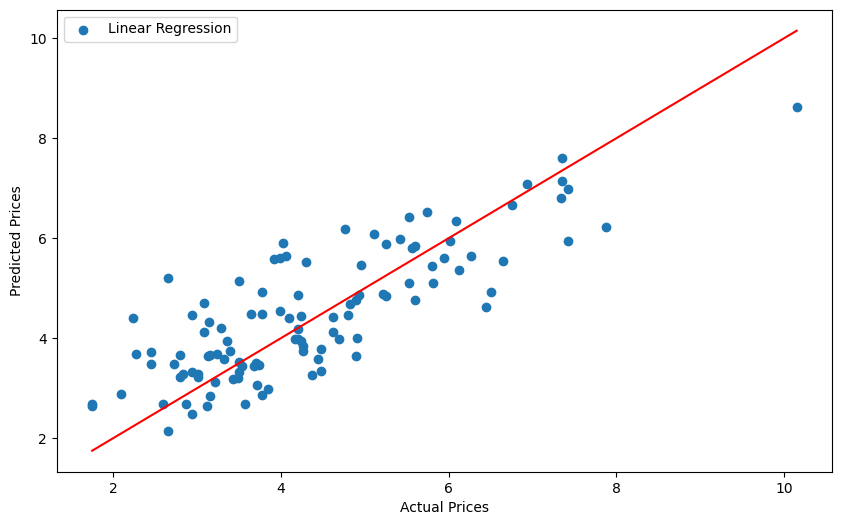

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test, label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()



In [10]:
print(y_pred_linear_test)
print(y_test)

[[ 3984967.27379869]
 [ 6244647.72325838]
 [ 4429090.99016441]
 [ 7327161.48579818]
 [ 2884712.13473905]
 [ 6980921.09080044]
 [ 3292173.52565773]
 [ 3158447.77360932]
 [ 3546517.87305605]
 [ 8271816.41131331]
 [ 6618193.85905409]
 [ 3751711.14944585]
 [ 3753935.40317281]
 [ 4583853.18651575]
 [ 3966468.54850109]
 [ 2025300.97229439]
 [ 3979784.91637274]
 [ 3615814.15041026]
 [ 3199944.39530576]
 [ 4676419.07100894]
 [ 5824326.87304756]
 [ 6417699.13990319]
 [ 4677337.71216349]
 [ 2728847.04375272]
 [ 5377896.73425207]
 [ 5707297.17442577]
 [ 5362417.43584814]
 [ 5438360.52073505]
 [ 5617773.48208082]
 [ 5898735.9284781 ]
 [ 3300971.79501467]
 [ 6360929.40425072]
 [ 7164452.04681266]
 [ 2981160.3063386 ]
 [ 4451574.86158016]
 [ 5152282.50541987]
 [ 4970121.01081922]
 [ 3650908.24269673]
 [ 2936483.25105248]
 [ 4005062.87644456]
 [ 8012393.06719836]
 [ 4975403.38914819]
 [ 6433427.87760297]
 [ 3614305.53600402]
 [ 3906804.95173331]
 [ 6295100.53701061]
 [ 4547614.9416484 ]
 [ 2757858.49

Lasso

In [20]:
from sklearn.linear_model import Ridge, Lasso



In [21]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [25]:
lasso_cv_score = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print('RMSE: ', rmse_lasso)
print('R2: ', r2_lasso)

RMSE:  1.0429829847802445
R2:  0.6863983245183924
